<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

url = "solicitacoescredito.csv"
df = pd.read_csv(url)
#df_sub = df[["faturamentoBruto", "duplicatasAReceber", "estoque", "totalAtivo", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei"]]
df_sub = df[['razaoSocial','maiorAtraso', 'percentualProtestos', 'prazoMedioRecebimentoVendas', 'titulosEmAberto', 'valorSolicitado', 'percentualRisco', 'valorAprovado', 'ativoCirculante', 'passivoCirculante', 'totalAtivo', 'endividamento', 'duplicatasAReceber', 'faturamentoBruto', 'margemBruta', 'custos', 'restricoes', 'empresa_MeEppMei', 'scorePontualidade']]

# , 'intervaloFundacao'



In [10]:
df_filtrado = df_sub.dropna()

In [12]:
df_filtrado.head(8)

,razaoSocial,maiorAtraso,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,percentualRisco,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,endividamento,duplicatasAReceber,faturamentoBruto,margemBruta,custos,restricoes,empresa_MeEppMei,scorePontualidade
4,Nigel Lee,20,0.0,20,1486.95,50000.0,0.169811,50000.0,14758917.0,12149031.0,25793410.0,3039112.0,11797928.0,40779757.0,81459809.0,40680051.0,False,False,1.000000
7,Jean Berry,4,0.0,102,208980.00,300000.0,0.056604,300000.0,17801610.0,2538069.0,19415777.0,0.0,3742963.0,11958227.0,9357949.0,0.0,False,False,1.000000
8,Elliot Stephenson,43,0.0,27,6432.00,400000.0,0.113208,400000.0,36827690.0,13843198.0,39455945.0,0.0,15980275.0,72479551.0,6233236.0,-49267738.0,False,False,1.000000
14,Anthony Moore-Jones,4,0.0,0,0.00,200000.0,0.207547,200000.0,11780048.0,11680162.0,12582116.0,1567918.0,6873822.0,36783195.0,-312950.0,-25744597.0,False,False,1.000000
19,Brian Harris,5,0.0,0,0.00,2000000.0,0.113208,1600000.0,1164378.0,50773.0,1164378.0,0.0,0.0,57950454.0,18419747.0,39530707.0,False,False,0.999976
21,Marilyn Chan-Anderson,60,0.0,1,2400.02,350000.0,0.528302,180000.0,1164378.0,1164378.0,1164378.0,0.0,0.0,1976986.0,339799.0,832480.0,True,True,0.691342
22,Mary Smith,18,0.0,0,0.00,50000.0,0.320755,50000.0,3670009.0,139759.0,3775553.0,0.0,1444038.0,9077423.0,1182617.0,-6807767.0,False,True,0.991829
23,Mr. Danny Davies,35,0.0,25,46949.30,320000.0,0.433962,200000.0,436463830.0,463089426.0,732841447.0,141143911.0,128135703.0,282662079.0,52217624.0,258298725.0,True,False,0.769472


In [7]:
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [ ]:
df_filtrado.isnull().sum()

razaoSocial                    0
maiorAtraso                    0
percentualProtestos            0
prazoMedioRecebimentoVendas    0
titulosEmAberto                0
valorSolicitado                0
percentualRisco                0
valorAprovado                  0
ativoCirculante                0
passivoCirculante              0
totalAtivo                     0
endividamento                  0
duplicatasAReceber             0
faturamentoBruto               0
margemBruta                    0
custos                         0
restricoes                     0
empresa_MeEppMei               0
scorePontualidade              0
dtype: int64

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3666 entries, 4 to 8961
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   razaoSocial                  3666 non-null   object 
 1   maiorAtraso                  3666 non-null   int64  
 2   percentualProtestos          3666 non-null   float64
 3   prazoMedioRecebimentoVendas  3666 non-null   int64  
 4   titulosEmAberto              3666 non-null   float64
 5   valorSolicitado              3666 non-null   float64
 6   percentualRisco              3666 non-null   float64
 7   valorAprovado                3666 non-null   float64
 8   ativoCirculante              3666 non-null   float64
 9   passivoCirculante            3666 non-null   float64
 10  totalAtivo                   3666 non-null   float64
 11  endividamento                3666 non-null   float64
 12  duplicatasAReceber           3666 non-null   float64
 13  faturamentoBruto       

In [16]:
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


from matplotlib import pyplot as plt
_df_0['numero_solicitacao'].plot(kind='hist', bins=20, title='numero_solicitacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['maiorAtraso'].plot(kind='hist', bins=20, title='maiorAtraso')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['margemBrutaAcumulada'].plot(kind='hist', bins=20, title='margemBrutaAcumulada')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['percentualProtestos'].plot(kind='hist', bins=20, title='percentualProtestos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='numero_solicitacao', y='maiorAtraso', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='maiorAtraso', y='margemBrutaAcumulada', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='margemBrutaAcumulada', y='percentualProtestos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='percentualProtestos', y='prazoMedioRecebimentoVendas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['numero_solicitacao'].plot(kind='line', figsize=(8, 4), title='numero_solicitacao')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['maiorAtraso'].plot(kind='line', figsize=(8, 4), title='maiorAtraso')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['margemBrutaAcumulada'].plot(kind='line', figsize=(8, 4), title='margemBrutaAcumulada')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['percentualProtestos'].plot(kind='line', figsize=(8, 4), title='percentualProtestos')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
df.nunique()
#df_filtrado.drop_duplicates(inplace=True)

numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [27]:
df= df.drop(columns=["razaoSocial", "nomeFantasia", "cnpjSemTraco", "status", "primeiraCompra", "intervaloFundacao","dataAprovadoNivelAnalista", "definicaoRisco", "restricoes", "periodoBalanco", "dataAprovadoEmComite", "anoFundacao"])
#df_filtrado = df_filtrado.drop(columns=["razaoSocial"])


In [32]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

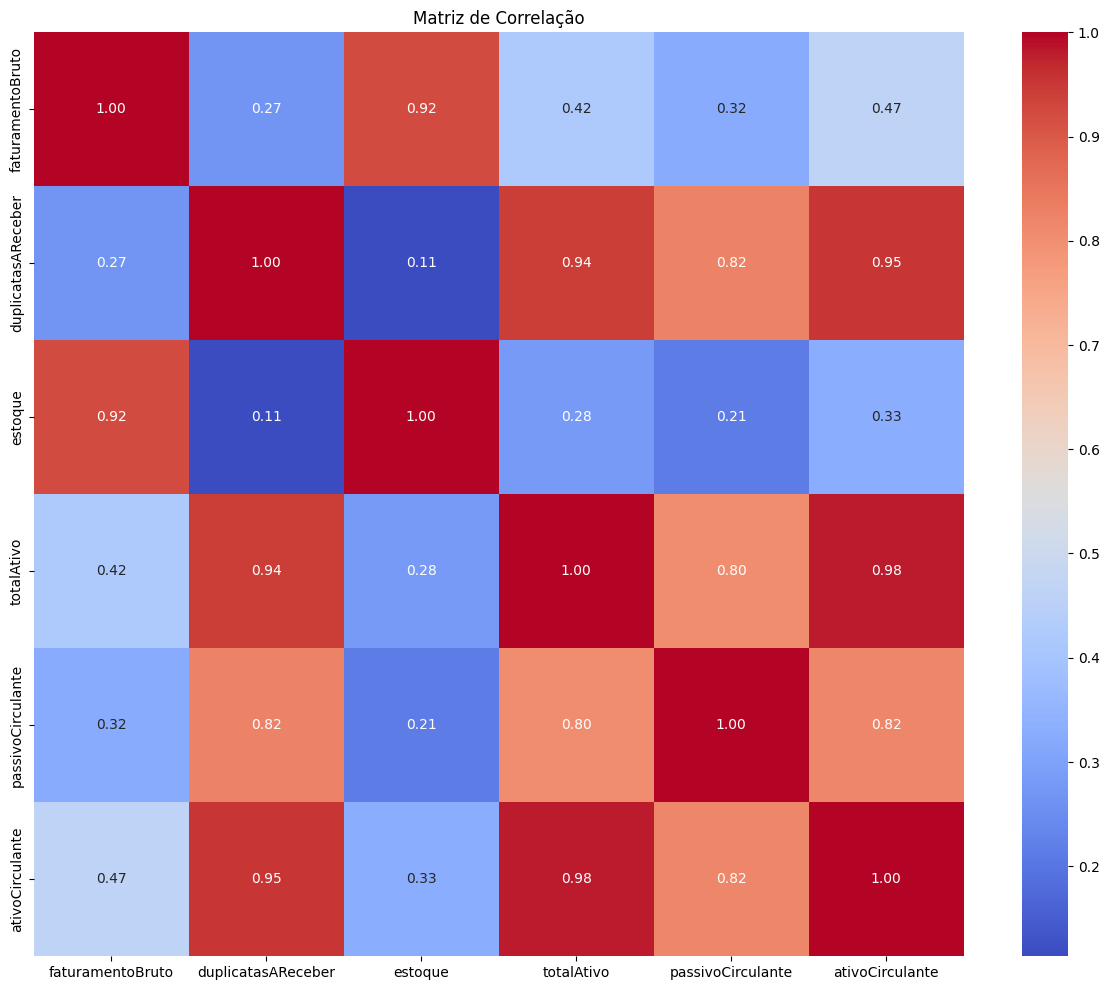

In [33]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [7]:
import seaborn as sns
g = sns.violinplot(y='empresa_MeEppMei', x='faturamentoBruto', data=df_sub, inner='quartile')
plt.show()
# g = sns.violinplot(y='empresa_MeEppMei', x='faturamentoBruto', data=df, inner='quartile')
# plt.show()g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')plt.show()g = sns.violinplot(y='species', x='petal_width', data=df_sub, inner='quartile')plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f23cfd99120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f23cfd983a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
X = df_filtrado.drop(columns=["razaoSocial"])
y = df_filtrado["razaoSocial"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy))

Acurácia do modelo Random Forest: 0.79


In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gbm.fit(X_train, y_train)

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy))

In [ ]:
import tensorflow as tf

# Cria o modelo de rede neural
# aqui devemos definir ao menos a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...
model_rn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(428, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(364, activation='relu',),
    tf.keras.layers.Dense(166, activation='relu',),
     tf.keras.layers.Dense(66, activation='relu',),
    tf.keras.layers.Dense(1)
])

# Compila o modelo
model_rn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treina o modelo
historico_epochs = model_rn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Fazendo as predições
y_pr = model_rn.predict(X_test_scaled)

In [2]:
import numpy as np
sum(np.isnan('definicaoRisco'))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''